In [1]:
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

In [2]:
u_inf=1.0

(-1.1, 1.1)

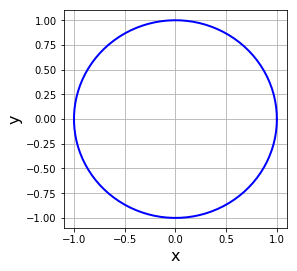

In [3]:
R,x_centre,y_centre=1.0,0.0,0.0
theta=numpy.linspace(0.0,2*math.pi,100)
x_cylinder, y_cylinder=(x_centre+R*numpy.cos(theta),y_centre+R*numpy.sin(theta))
size=4
pyplot.figure(figsize=(size,size))
pyplot.grid()
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.plot(x_cylinder,y_cylinder,color='b',linestyle='-',linewidth=2)
pyplot.xlim(-1.1,1.1)
pyplot.ylim(-1.1,1.1)

In [4]:
class Panel:
    def __init__(self,xa,ya,xb,yb):
        self.xa,self.ya=xa,ya
        self.xb,self.yb=xb,yb
        self.xc,self.yc=(xa+xb)/2,(ya+yb)/2
        self.length=math.sqrt((xb-xa)**2+(yb-ya)**2)
        if xb-xa<=0.:
            self.beta=math.acos((yb-ya)/self.length)
        elif xb-xa>0.0:
            self.beta=math.pi+math.acos(-(yb-ya)/self.length)
        self.sima=0.0
        self.vt=0.0
        self.cp=0.0

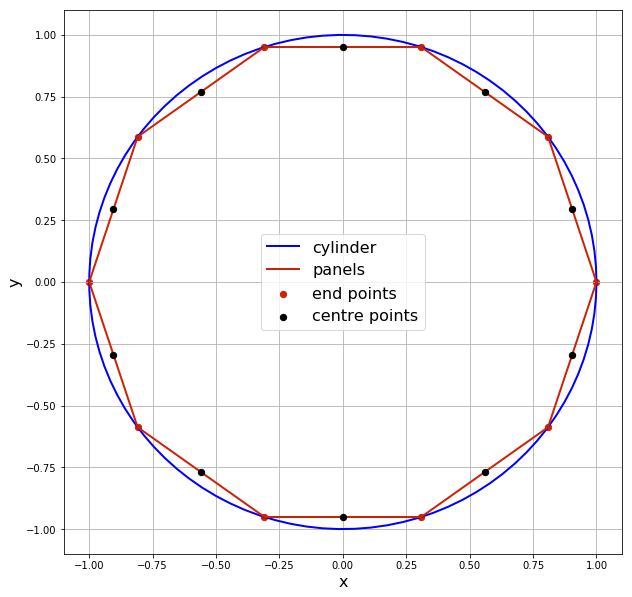

In [5]:
N_panels=10
x_ends=R*numpy.cos(numpy.linspace(0.0,2*math.pi,N_panels+1))
y_ends=R*numpy.sin(numpy.linspace(0.0,2*math.pi,N_panels+1))
panels=numpy.empty(N_panels,dtype=object)
for i in range(N_panels):
    panels[i]=Panel(x_ends[i],y_ends[i],x_ends[i+1],y_ends[i+1])
size=10
pyplot.figure(figsize=(size,size))
pyplot.grid()
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.plot(x_cylinder,y_cylinder,label='cylinder',color='b',linestyle='-',linewidth=2)
pyplot.plot(x_ends,y_ends,label='panels',color='#CD2305',linestyle='-',linewidth=2)
pyplot.scatter([p.xa for p in panels],[p.ya for p in panels],label='end points',color='#CD2305',s=40)
pyplot.scatter([p.xc for p in panels],[p.yc for p in panels],label='centre points',color='k',s=40,zorder=3)
pyplot.legend(loc='best',prop={'size':16})
pyplot.xlim(-1.1,1.1)
pyplot.ylim(-1.1,1.1);

In [6]:
def integral_normal(pi,pj):
    def integrand(s):
        return (((pi.xc - (pj.xa - math.sin(pj.beta) * s)) * math.cos(pi.beta) +
                 (pi.yc - (pj.ya + math.cos(pj.beta) * s)) * math.sin(pi.beta)) /
                ((pi.xc - (pj.xa - math.sin(pj.beta) * s))**2 +
                 (pi.yc - (pj.ya + math.cos(pj.beta) * s))**2))
    return integrate.quad(integrand,0.0,pj.length)[0]

In [7]:
A=numpy.empty((N_panels,N_panels),dtype=float)
numpy.fill_diagonal(A,0.5)

for i,pi in enumerate(panels):
    for j,pj in enumerate(panels):
        if i!= j:
            A[i,j]=0.5/math.pi*integral_normal(pi,pj)

b= -u_inf*numpy.cos([p.beta for p in panels])            

In [8]:
sigma=numpy.linalg.solve(A,b)

for i, panel in enumerate(panels):
    panel.sigma=sigma[i]

In [9]:
def integral_tangential(pi1,pj1):
    def integrand(s):
        return ((-(pi1.xc - (pj1.xa - math.sin(pj1.beta) * s)) * math.sin(pi1.beta) +
                 (pi1.yc - (pj1.ya + math.cos(pj1.beta) * s)) * math.cos(pi1.beta)) /
                ((pi1.xc - (pj1.xa - math.sin(pj1.beta) * s))**2 +
                 (pi1.yc - (pj1.ya + math.cos(pj1.beta) * s))**2))
    return integrate.quad(integrand,0.0,pj1.length)[0]

In [10]:
A=numpy.empty((N_panels,N_panels),dtype=float)
numpy.fill_diagonal(A,0.0)

for i, pi1 in enumerate(panels):
    for j, pj1 in enumerate(panels):
        if i != j:
            A[i, j] = 0.5 / math.pi * integral_tangential(pi1, pj1)

# compute the RHS of the linear system
b = - u_inf * numpy.sin([panel.beta for panel in panels])

# compute the tangential velocity at each panel center-point
vt = numpy.dot(A, sigma) + b

for i, panel in enumerate(panels):
    panel.vt = vt[i]

In [11]:
for panel in panels:
    panel.cp=1.0-(panel.vt/u_inf)**2


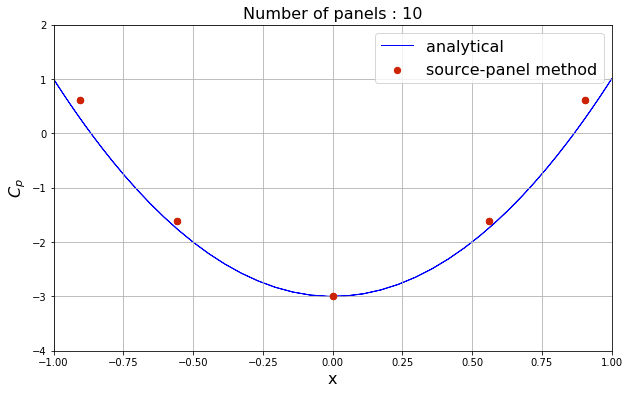

In [12]:
cp_analytical=1.0-4*(y_cylinder/R)**2
pyplot.figure(figsize=(10,6))
pyplot.grid()
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('$C_p$',fontsize=16)
pyplot.plot(x_cylinder, cp_analytical,
            label='analytical',
            color='b', linestyle='-', linewidth=1, zorder=1)
pyplot.scatter([p.xc for p in panels], [p.cp for p in panels],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)
pyplot.title('Number of panels : %d' % N_panels, fontsize=16)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-4.0, 2.0);